In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [44]:
import glob

darkflame_files = glob.glob('../../data/darkflame_noise/*.dat')

In [45]:
darkflames = [np.fromfile(darkflame_file, dtype=np.uint16) for darkflame_file in darkflame_files]
N = int(math.sqrt(darkflames[0].shape[0]))
darkflame_num = len(darkflames)
darkflames = np.array([df.reshape((N, N)) for df in darkflames])

In [46]:
average = np.sum(darkflames, axis=0) / darkflame_num
average.shape

(2048, 2048)

62444.26666666667
1063.6
1113.4498844623567
1113.0666666666666
3697.499572770759
60.80706844414356
18


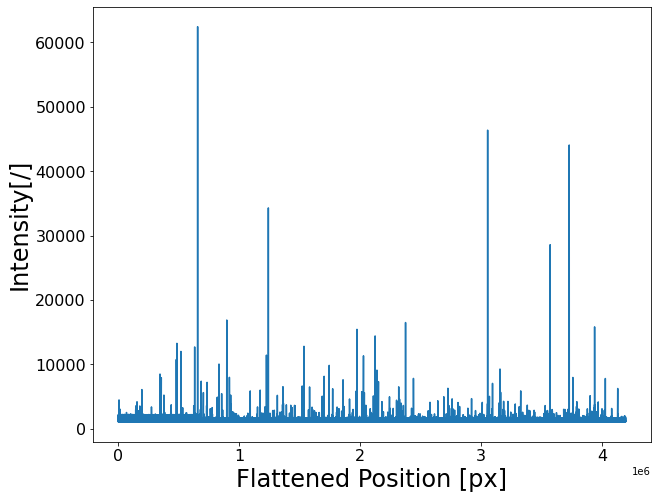

In [110]:
# 平均化されたダークフレーム内での話

print(np.max(average))
print(np.min(average))
print(np.mean(average))
print(np.median(average))
average_mean = np.mean(average)
average_variance = np.mean((average - average_mean)**2)
average_deviation = math.sqrt(average_variance)
print(average_variance)
print(average_deviation)
print(np.sum(average > 10000))

fig = plt.figure(figsize=(10, 8))
average_ravel = average.ravel()
plt.plot(average_ravel)
plt.ylabel('Intensity[/]', fontsize=24)
plt.xlabel('Flattened Position [px]', fontsize=24)
plt.tick_params(labelsize=16)
fig.savefig('../../thesis/chap5/figure/darkflame_average_ravel.png')

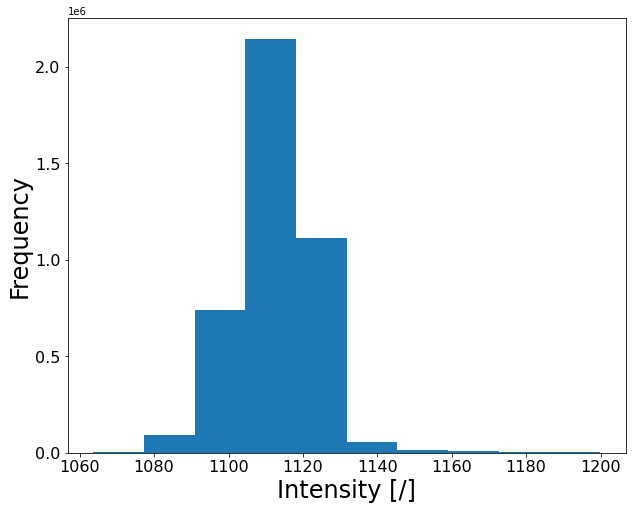

In [111]:
fig = plt.figure(figsize=(10, 8))
plt.hist(average_ravel[average_ravel < 1200])
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Intensity [/]', fontsize=24)
plt.tick_params(labelsize=16)
fig.savefig('../../thesis/chap5/figure/darkflame_average_histogram.png')

In [107]:
# 15枚全体でのダークフレームのランダムエラーについての話

variance = np.mean((darkflames - average)**2, axis=0)
deviation = np.sqrt(variance)

print(np.max(deviation))
print(np.min(deviation))
print(np.mean(deviation))
print(np.median(deviation))
print(math.sqrt(np.mean(np.abs(deviation - np.mean(deviation))**2)))

3040.990033232963
4.096611065529925
15.462028932354752
15.33478254021085
4.107142069024326


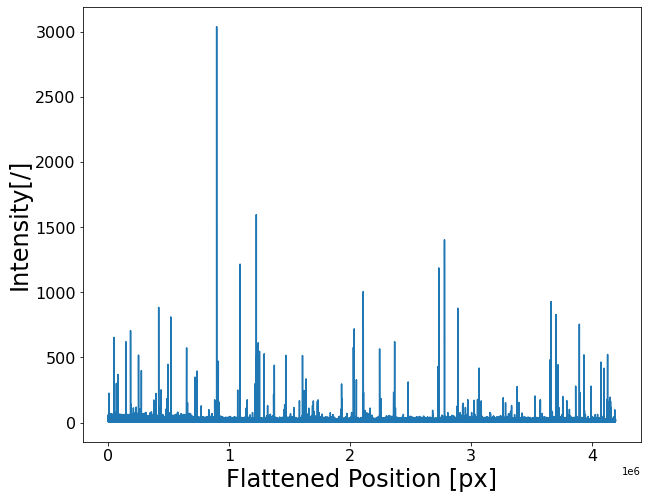

In [112]:
fig = plt.figure(figsize=(10, 8))
deviation_ravel = deviation.ravel()
plt.plot(deviation_ravel)
plt.ylabel('Intensity[/]', fontsize=24)
plt.xlabel('Flattened Position [px]', fontsize=24)
plt.tick_params(labelsize=16)
fig.savefig('../../thesis/chap5/figure/darkflame_deviation_ravel.png')

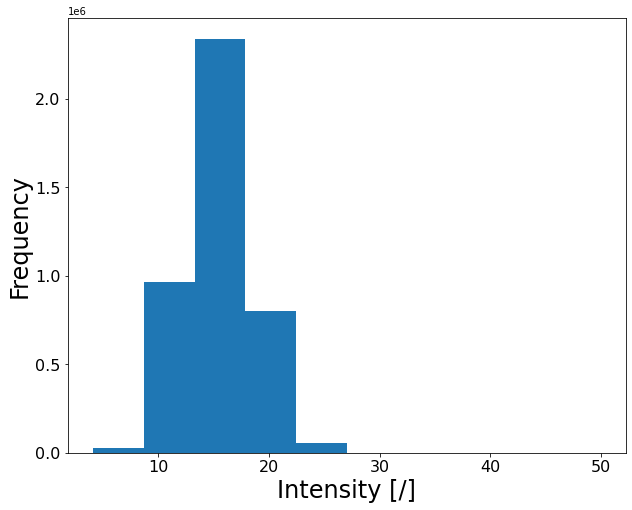

In [113]:
fig = plt.figure(figsize=(10, 8))
plt.hist(deviation_ravel[deviation_ravel < 50])
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Intensity [/]', fontsize=24)
plt.tick_params(labelsize=16)
fig.savefig('../../thesis/chap5/figure/darkflame_deviation_histogram.png')

In [38]:
for darkflame in darkflames:
    print(darkflame.ravel()[np.argmax(deviation)])

17852
17610
17534
17727
17664
17603
5529
17751
17673
17846
17639
17879
17723
17813
17680


In [114]:
for darkflame in darkflames:
    print(np.mean(darkflame))

1113.7777116298676
1112.7510569095612
1113.7214019298553
1113.4887354373932
1113.2430257797241
1113.3807351589203
1114.8584966659546
1112.6732769012451
1114.7169635295868
1114.3206775188446
1112.866693019867
1112.7314467430115
1112.7833359241486
1113.1258170604706
1113.3088927268982


In [83]:
#average[average > 30000]
deviation[average > 10000] / average[average > 10000]

array([0.00969155, 0.01377006, 0.06748396, 0.00391464, 0.00244975,
       0.00981655, 0.17992391, 0.1395128 , 0.01785913, 0.00903163,
       0.00459824, 0.05085924, 0.00645199, 0.00682096, 0.00383357,
       0.00360682, 0.00258937, 0.00586202])